# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("mcdonalds.csv")
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
df.shape

(1453, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [7]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [8]:
df.loc[df.duplicated(),:]

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
404,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,I love it!+5,50,Once a week,Female
421,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+3,25,Once a month,Male
441,No,Yes,No,Yes,No,Yes,Yes,No,No,No,No,+2,62,Every three months,Female
453,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+2,43,Every three months,Female
598,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No,Yes,I hate it!-5,59,Never,Female
674,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,26,More than once a week,Female
710,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+4,49,Once a week,Female
725,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,0,42,Once a month,Female
741,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+2,21,Every three months,Female
744,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,18,Once a week,Female


In [9]:
df.duplicated().sum()

22

In [10]:
df=df.drop_duplicates()

In [11]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [12]:
df.shape

(1431, 15)

In [13]:
df['Gender'].value_counts()

Female    772
Male      659
Name: Gender, dtype: int64

In [14]:
df['VisitFrequency'].value_counts()

Once a month             427
Every three months       339
Once a year              252
Once a week              232
Never                    128
More than once a week     53
Name: VisitFrequency, dtype: int64

In [15]:
df['Like'].value_counts()

+3              225
+2              180
0               168
+4              156
+1              152
I hate it!-5    150
I love it!+5    140
-3               73
-4               70
-2               59
-1               58
Name: Like, dtype: int64

# EDA

Text(0.5, 1.0, 'Gender Distribution')

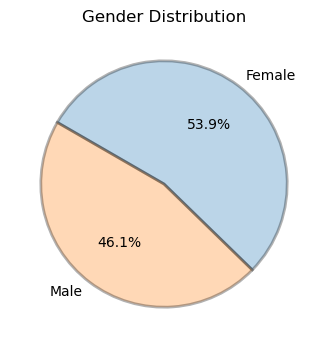

In [16]:
plt.figure(figsize=(4,4)) 
df['Gender'].value_counts().plot(kind='pie', legend=
                                 None, ylabel='', 
                                 counterclock=False, startangle=150, 
                                 wedgeprops={'alpha':0.3, 'edgecolor' : 'black','linewidth': 2, 'antialiased': True}, 
                                 autopct='%1.1f%%')
plt.title('Gender Distribution')

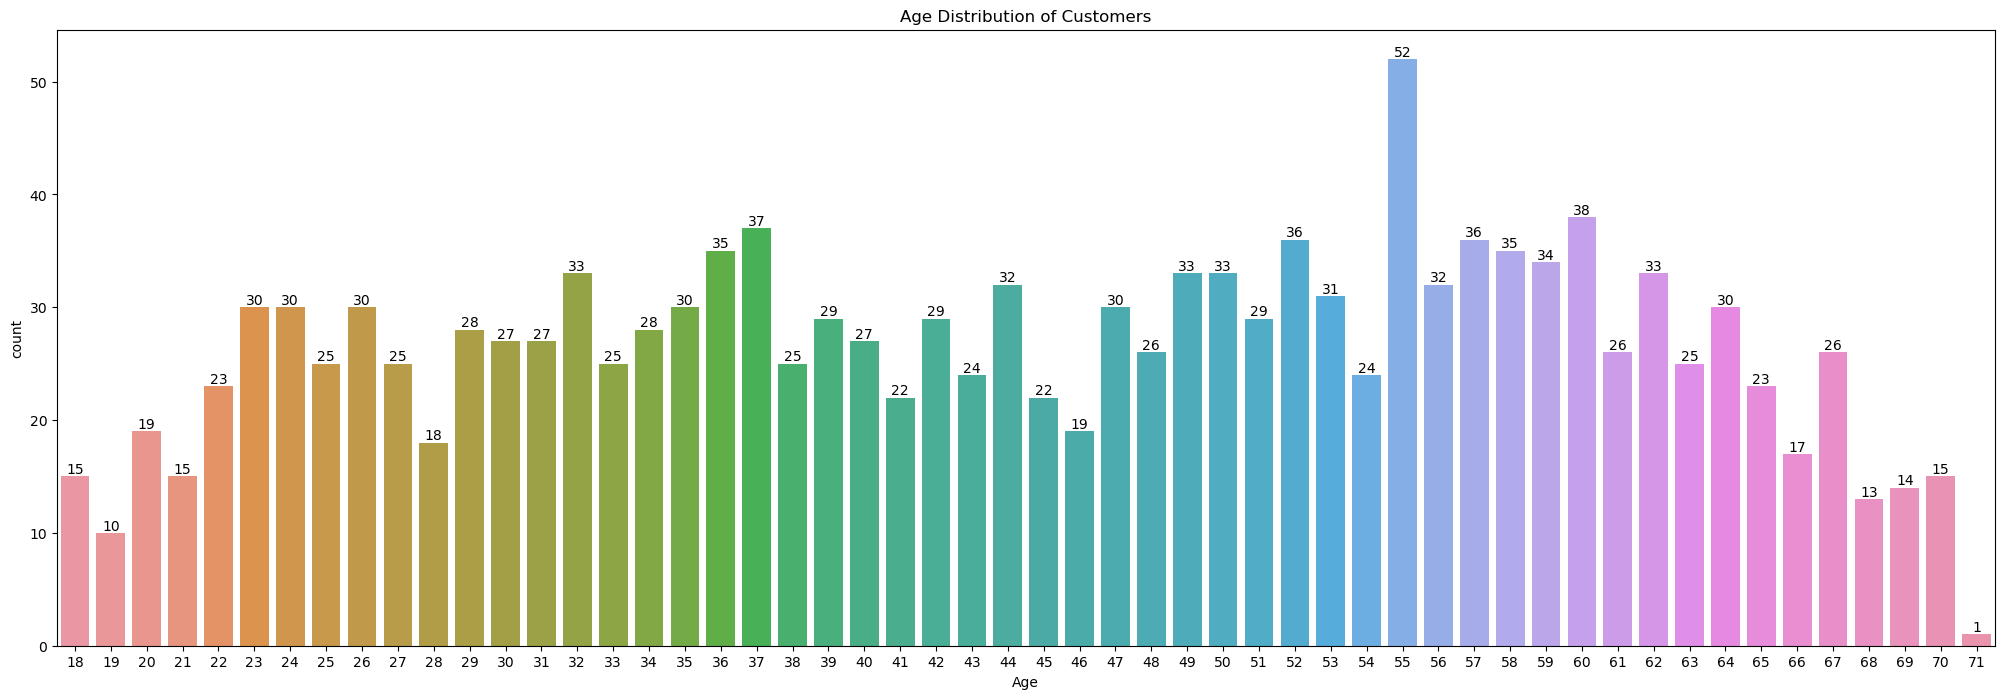

In [17]:
plt.rcParams['figure.figsize']=(25,8)
f=sns.countplot(x=df['Age'])
f.bar_label(f.containers[0])
plt.title('Age Distribution of Customers')
plt.show()

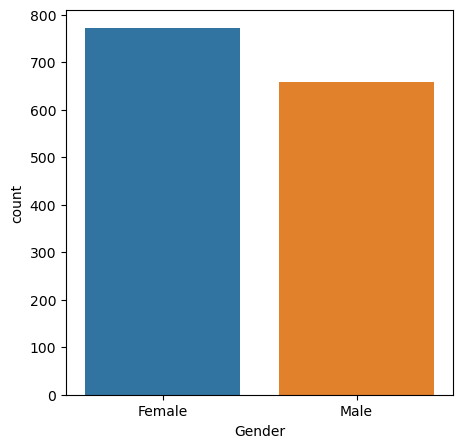

In [18]:
plt.rcParams['figure.figsize']=(5,5)
sns.countplot(x="Gender", data=df)
plt.show()

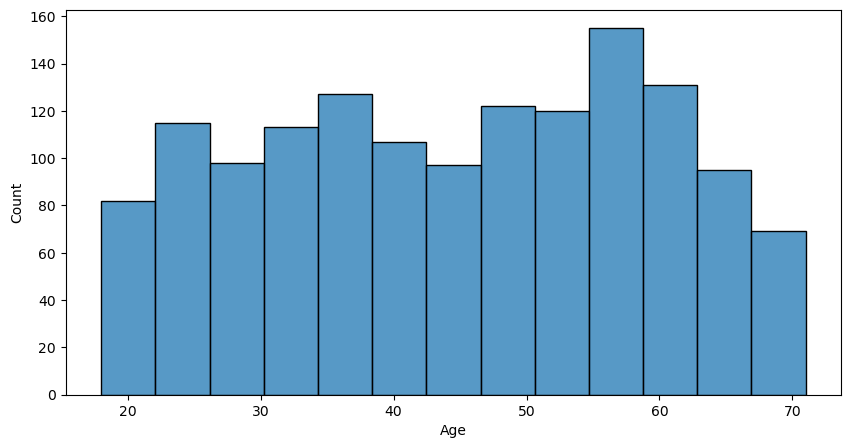

In [19]:
# Check the distribution of the 'Age' column
plt.rcParams['figure.figsize']=(10,5)
sns.histplot(df['Age'])
plt.show()

In [20]:
df['Like']=df['Like'].replace({'I hate it!-5':'-5','I love it!+5':'+5'})
df['Like'].unique()

array(['-3', '+2', '+1', '+4', '+5', '-5', '-2', '+3', '0', '-4', '-1'],
      dtype=object)

In [21]:
#Label Encoding for categorical data
def encoding(x):
    df[x]=LabelEncoder().fit_transform(df[x])
    return df

category = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in category:
    encoding(i)


In [22]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [23]:
data=df.loc[:,category]
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


array([[<Axes: title={'center': 'yummy'}>,
        <Axes: title={'center': 'convenient'}>,
        <Axes: title={'center': 'spicy'}>],
       [<Axes: title={'center': 'fattening'}>,
        <Axes: title={'center': 'greasy'}>,
        <Axes: title={'center': 'fast'}>],
       [<Axes: title={'center': 'cheap'}>,
        <Axes: title={'center': 'tasty'}>,
        <Axes: title={'center': 'expensive'}>],
       [<Axes: title={'center': 'healthy'}>,
        <Axes: title={'center': 'disgusting'}>, <Axes: >]], dtype=object)

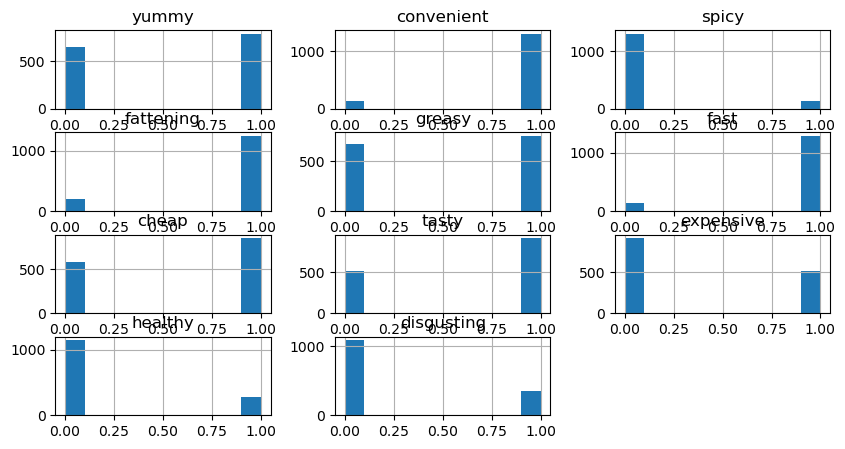

In [24]:
data.hist()

# PCA

In [25]:
from sklearn import preprocessing
pca_data = preprocessing.scale(data)

pca = PCA(n_components=11)
pc=pca.fit_transform(data)
names=["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9", "pc10", "pc11"]
pf = pd.DataFrame(data=pc, columns=names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.419114,-0.231691,0.660553,-0.394399,0.200925,-0.391549,-0.213729,0.167607,0.179510,0.531101,-0.554209
1,-0.220189,0.393341,-0.729516,-0.102505,0.043964,-0.085099,-0.095786,-0.034779,0.110699,0.507822,-0.487602
2,0.371455,0.728362,-0.124168,0.683734,0.849209,-0.677356,0.581753,0.364017,-0.327911,0.050151,0.243132
3,-0.179665,-0.345683,-0.851313,0.204693,-0.680349,-0.036688,-0.056524,-0.232855,-0.024518,-0.247991,-0.056664
4,0.173971,-0.808123,0.016911,0.545781,0.860236,-0.083213,-0.456052,0.164836,-0.073457,0.027998,0.081264
...,...,...,...,...,...,...,...,...,...,...,...
1426,1.547013,0.263928,-0.014192,0.201105,-0.146572,0.309209,-0.076867,0.344021,-0.136215,-0.419146,-0.464879
1427,-0.963333,0.018977,0.298754,0.445180,-0.134964,0.391248,-0.330860,0.870713,-0.305065,-0.240094,-0.197849
1428,-0.182781,1.057798,0.229392,-0.470739,-0.191532,-0.199227,-0.093868,-0.033670,0.039346,0.057964,-0.012160
1429,-1.188787,-0.033521,0.555086,0.696727,0.047700,0.195972,-0.024075,-0.345070,0.023337,-0.000024,-0.107268


In [26]:
std_dev=[]
for i in names:
    std_dev.append(np.std(pf[i]))
    
print('Standard Deviation')
np.array(std_dev)

Standard Deviation


array([0.75771158, 0.60650173, 0.50475152, 0.3989886 , 0.33857398,
       0.3119968 , 0.2916587 , 0.27662468, 0.2671078 , 0.25020426,
       0.2382666 ])

In [27]:
pov = pca.explained_variance_ratio_
print('Proportion of Variance')
pov

Proportion of Variance


array([0.29899056, 0.19156392, 0.13267983, 0.08290307, 0.05969759,
       0.05069322, 0.04429957, 0.03985029, 0.03715547, 0.03260161,
       0.02956487])

In [28]:
cp=np.cumsum(pca.explained_variance_ratio_)
print('Cumulative Proportion')
cp

Cumulative Proportion


array([0.29899056, 0.49055448, 0.62323431, 0.70613738, 0.76583497,
       0.81652819, 0.86082776, 0.90067805, 0.93783352, 0.97043513,
       1.        ])

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
components = pca.components_
num_pc = pca.n_features_
pc_name = ["PC"+str(i) for i in range(1,num_pc+1)]
loadings_df = pd.DataFrame

# Elbow Method

  File "C:\Users\rutuj\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\rutuj\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rutuj\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\rutuj\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


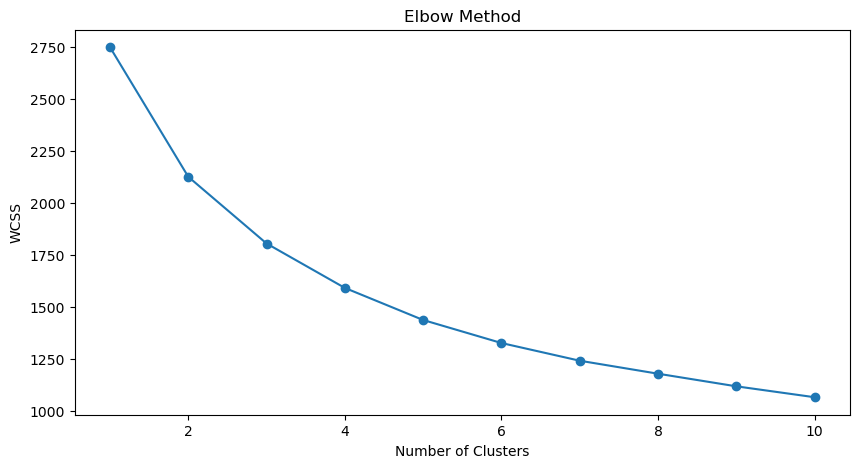

In [31]:
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(pf)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss,marker="o")
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0).fit(data)
df['cluster_num']=kmeans.labels_
print(kmeans.labels_)
print(kmeans.inertia_)
print(kmeans.n_iter_)
print(kmeans.cluster_centers_)

[2 3 3 ... 3 1 0]
1590.1023758044826
7
[[0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]
 [0.88536155 0.98059965 0.08818342 0.79365079 0.32627866 0.95943563
  0.92063492 0.97530864 0.01763668 0.32451499 0.04409171]
 [0.02341137 0.89297659 0.0735786  0.92307692 0.66555184 0.9632107
  0.93311037 0.15719064 0.01337793 0.0735786  0.38461538]
 [0.85266458 0.96238245 0.13479624 0.90595611 0.62382445 0.85893417
  0.10971787 0.93103448 0.89655172 0.20689655 0.10658307]]


In [33]:
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 299, 3: 319, 1: 567, 0: 246})

In [34]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1,num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = data.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.473652,0.370610,-0.301355,0.053818,-0.307839,0.170267,-0.278457,0.012604,0.574230,-0.107604,0.042649
convenient,-0.155302,0.016830,-0.062892,-0.144547,0.276766,-0.343663,-0.060092,-0.108304,-0.015511,-0.652477,-0.561015
spicy,-0.007448,0.019080,-0.039472,0.199271,0.073973,-0.353279,0.707035,0.381458,0.395773,-0.079203,0.140418
fattening,0.116058,-0.034366,-0.322261,-0.349149,-0.069891,-0.403426,-0.392024,0.590763,-0.160342,-0.011932,0.251830
greasy,0.303698,-0.057601,-0.802992,0.245048,0.362733,0.215346,0.038995,-0.141622,-0.002631,0.008337,0.001655
fast,-0.109396,-0.086865,-0.065928,-0.097602,0.112772,-0.598702,-0.085239,-0.625020,0.168059,0.228139,0.342411
cheap,-0.341107,-0.606855,-0.155916,0.123186,-0.127236,-0.101218,-0.040913,0.140513,0.073985,0.441522,-0.477097
tasty,-0.469349,0.312024,-0.285723,-0.006973,-0.211855,-0.079163,0.357405,-0.073368,-0.640410,0.075988,0.022303
expensive,0.333174,0.598525,0.028200,0.068841,-0.000381,-0.262920,-0.067548,0.031604,0.064168,0.466890,-0.477950


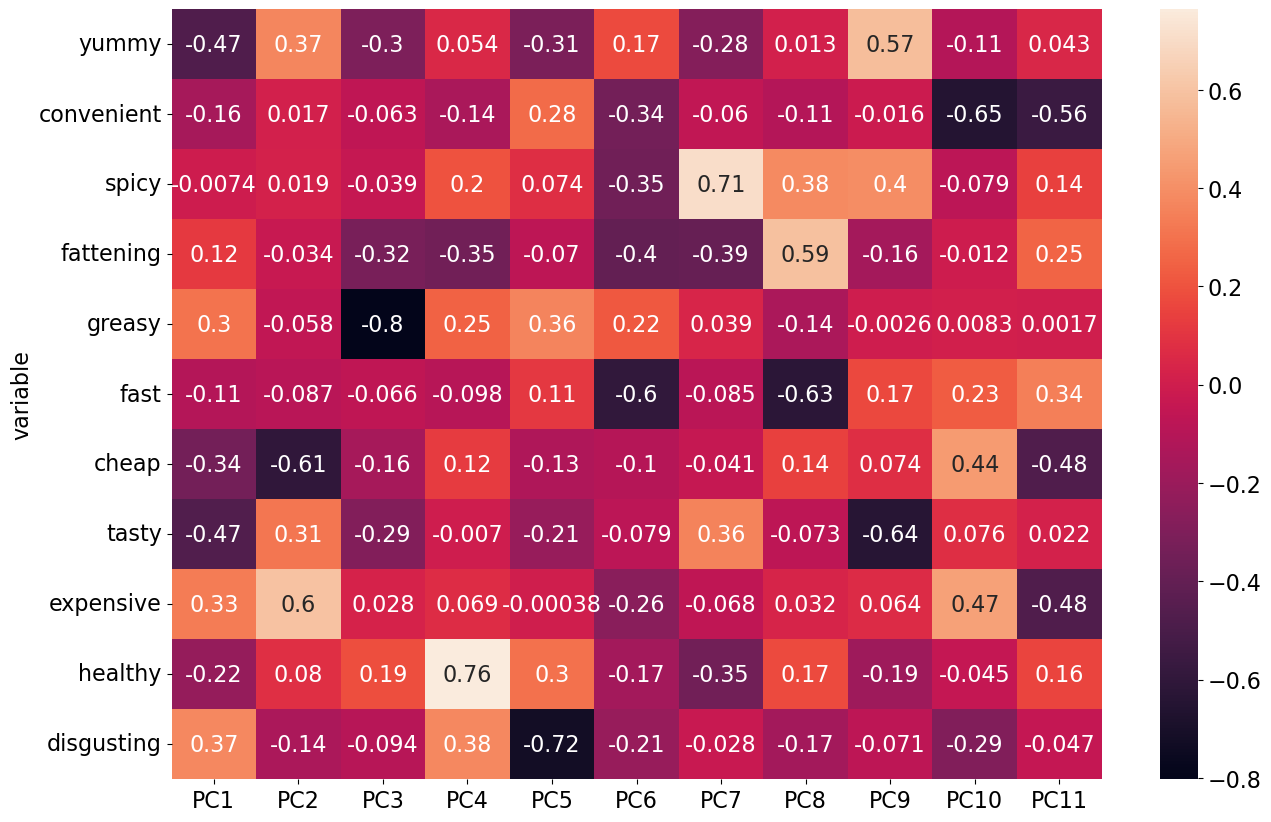

In [45]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (15,10)
ax = sns.heatmap(loadings_df, annot=True)
plt.show()

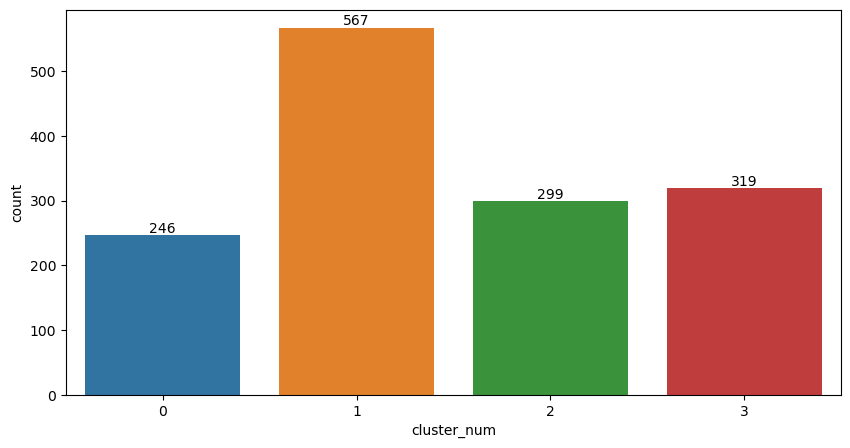

In [35]:
f = sns.countplot(x=df['cluster_num'])
f.bar_label(f.containers[0])
plt.rcParams['figure.figsize']=(25,8)

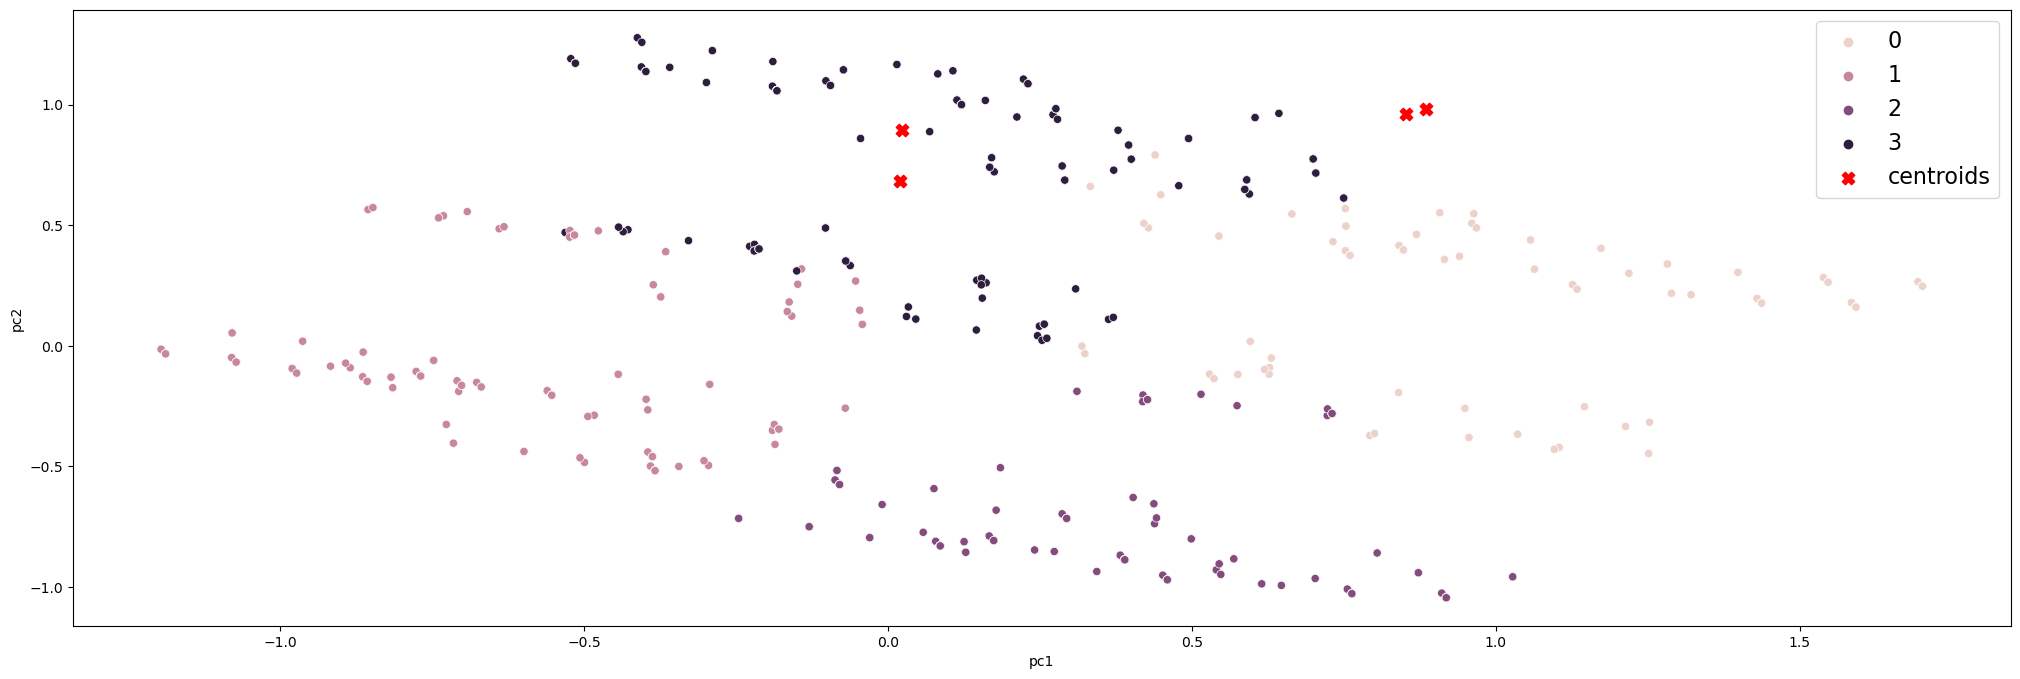

In [36]:
sns.scatterplot(data=pf,x="pc1",y="pc2",hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           marker="X",c="r",s=80, label="centroids")
plt.rcParams['figure.figsize']=(10,10)
plt.rcParams['font.size']=16
plt.legend()
plt.show()

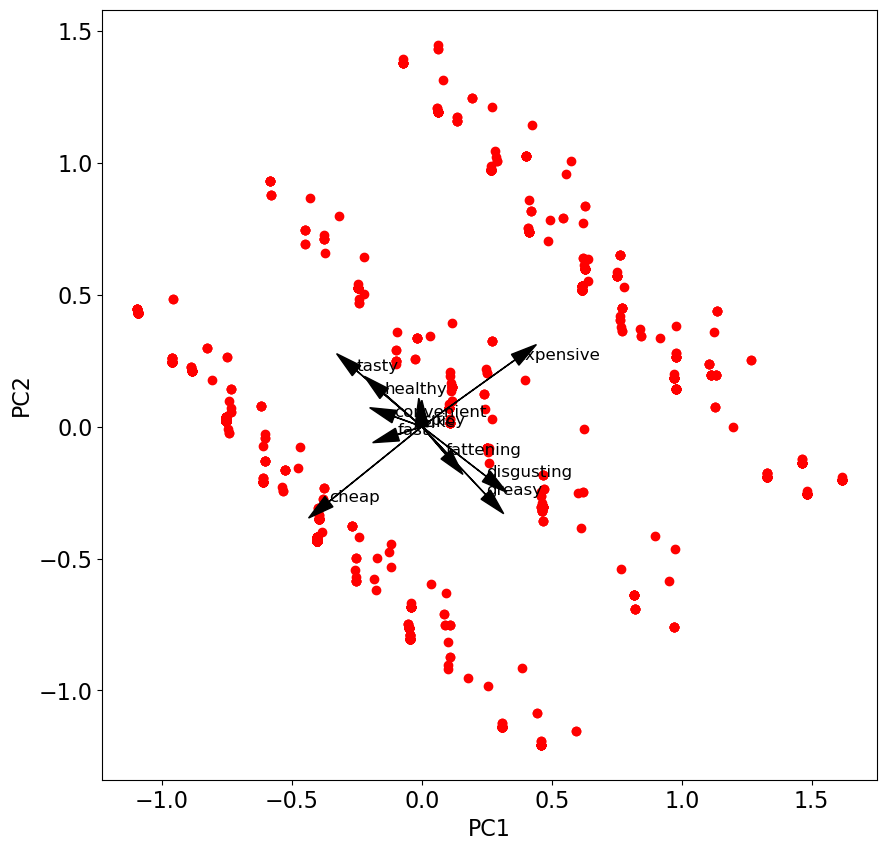

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Load data
mcdonalds = pd.read_csv("mcdonalds.csv")

# Create binary numeric segmentation variables
MD_x = mcdonalds.iloc[:, 1:12].apply(lambda x: (x == "Yes") + 0)

# Perform PCA
MD_pca = PCA(n_components=3)
MD_pca.fit(MD_x)

# Plot first two principal components
plt.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], color="red")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Plot projection axes
proj_axes = MD_pca.components_.T * np.sqrt(MD_pca.explained_variance_)
for i in range(len(proj_axes)):
    plt.arrow(0, 0, proj_axes[i, 0], proj_axes[i, 1], head_width=0.05, head_length=0.1, fc='k', ec='k')
    plt.annotate(MD_x.columns[i], (proj_axes[i, 0], proj_axes[i, 1]), size=12)

plt.show()
plt.rcParams['figure.figsize']=(10,10)

The loadings indicate how variables are combined to form principal components. 
The two highest loadings for PC2 in the McDonald's example are CHEAP and EXPENSIVE, indicating the importance of price.

In [48]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab_like=pd.crosstab(df['cluster_num'],df['Like'])

#reordering columns
crosstab_like=crosstab_like[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab_like

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,89,28,30,19,13,39,14,6,8,0,0
1,4,4,2,6,13,43,65,87,140,107,96
2,52,35,34,28,25,50,31,30,12,2,0
3,5,3,7,6,7,36,42,57,65,47,44


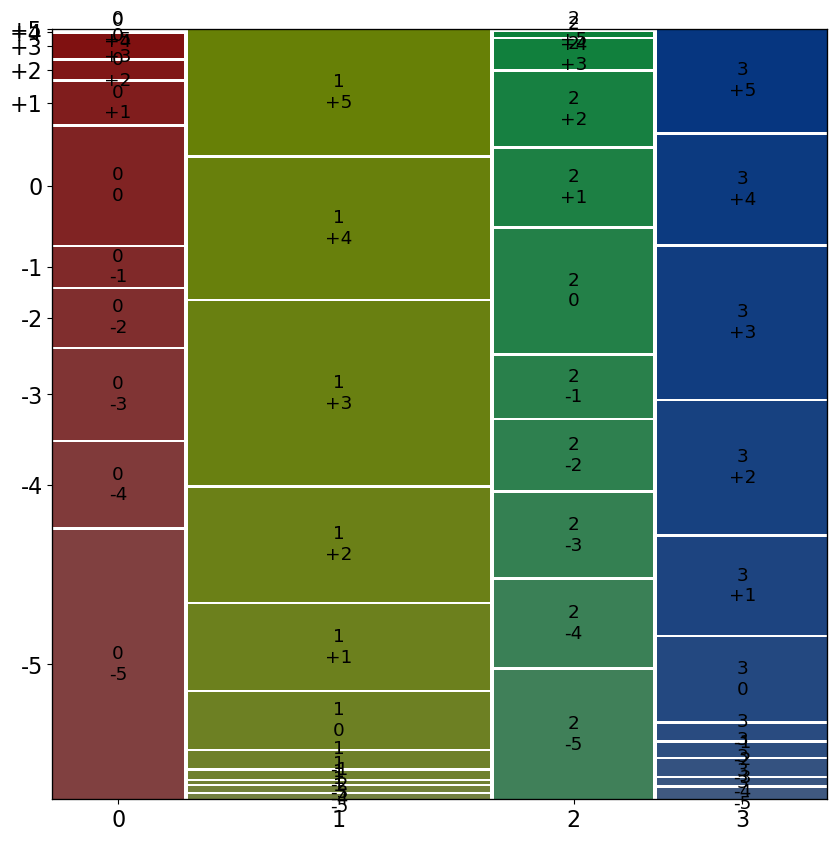

In [51]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (10,10)
mosaic(crosstab_like.stack())
plt.show()

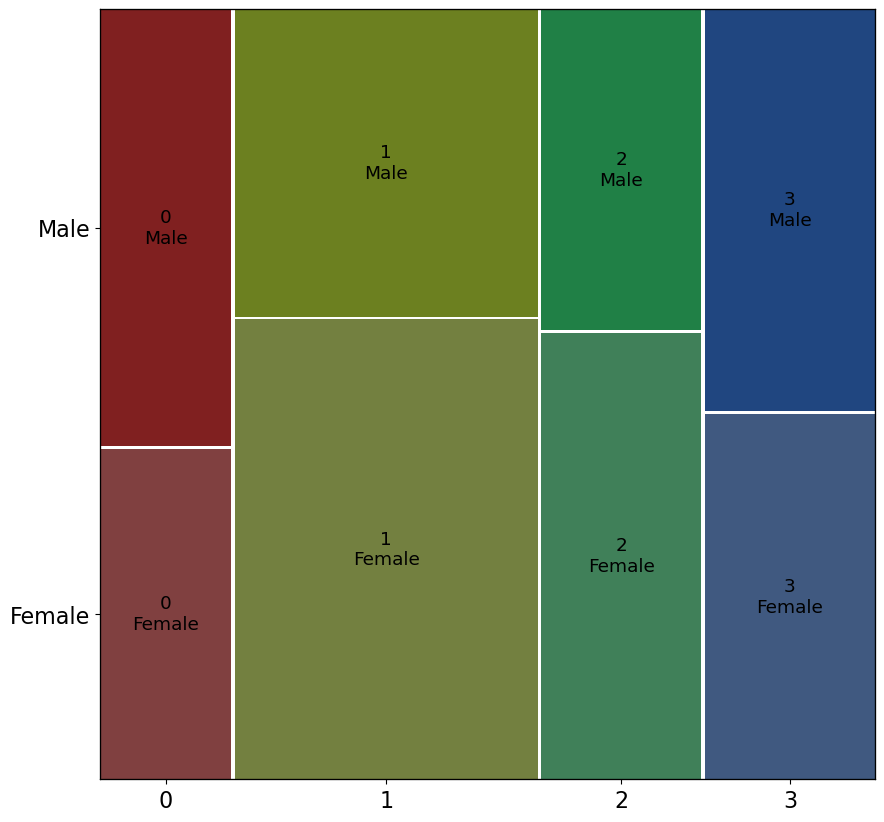

In [39]:
crosstab=pd.crosstab(df['cluster_num'],df['Gender'])

#reordering columns
crosstab=crosstab[['Female','Male']]
mosaic(crosstab.stack())
plt.rcParams['figure.figsize']=(5,5)
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

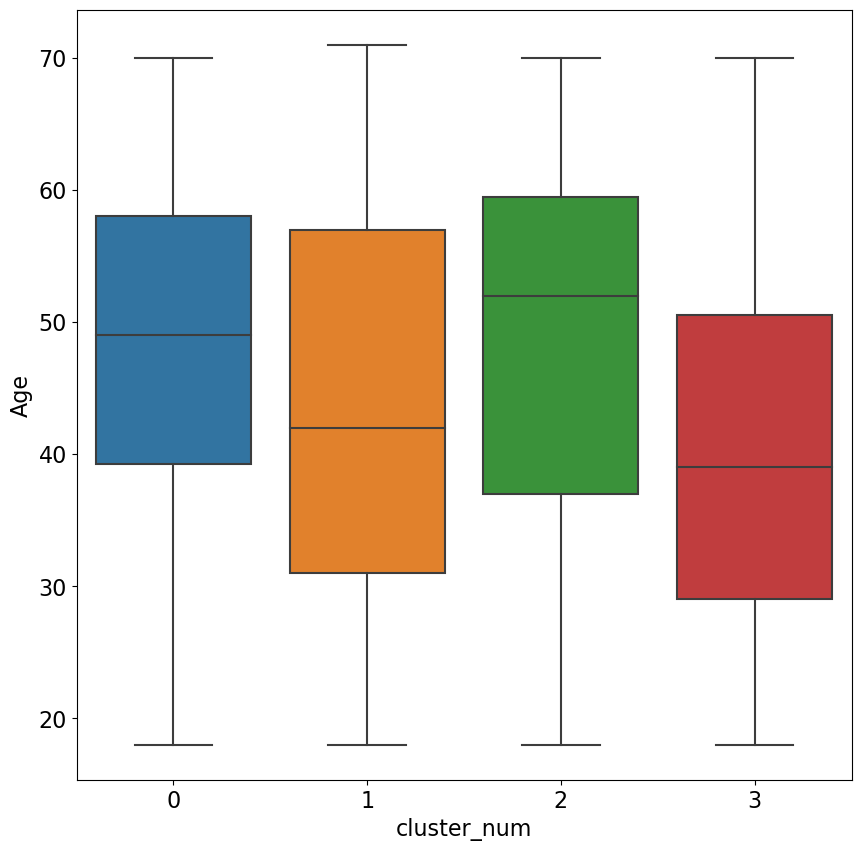

In [52]:
#box plot for age
sns.boxplot(x="cluster_num", y="Age", data=df)

# Using Regression Models

1918.5547949506483
1102.3048341193985


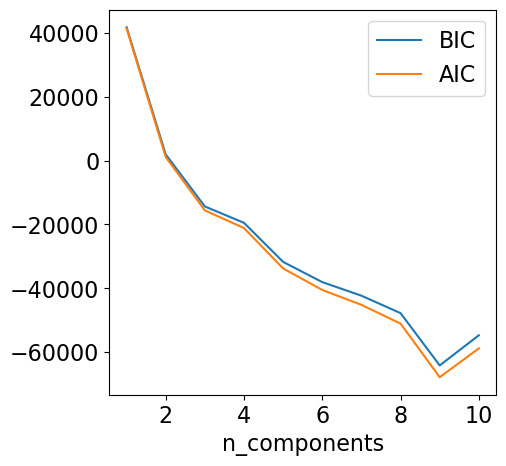

In [40]:
from sklearn.mixture import GaussianMixture
import re
from sklearn.preprocessing import StandardScaler

# Extract predictor variables and standardize the data
X = data.iloc[:, 2:12].values
scaler = StandardScaler()
X_std = scaler.fit_transform(data)

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=1234, n_init=10).fit(X_std)

# Print summary statistics
print(gmm.bic(X_std))
print(gmm.aic(X_std))

# Plot BIC and AIC
n_components = np.arange(1, 11)
models = [GaussianMixture(n, random_state=1234, n_init=10).fit(X_std) for n in n_components]
plt.plot(n_components, [m.bic(X_std) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_std) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()